<a href="https://colab.research.google.com/github/kushagrasharma-13/Artificial_Neural_network/blob/main/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANN on MNIST

Confusion Matrix

Classification Report

Accuracy

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import mnist 
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train_one_hot, batch_size=64, epochs=4)

Epoch 1/4
938/938 [==============================] - 3s 3ms/step - loss: 0.2927 - accuracy: 0.9146
Epoch 2/4
938/938 [==============================] - 4s 5ms/step - loss: 0.1196 - accuracy: 0.9646
Epoch 3/4
938/938 [==============================] - 4s 5ms/step - loss: 0.0832 - accuracy: 0.9744
Epoch 4/4
938/938 [==============================] - 5s 5ms/step - loss: 0.0631 - accuracy: 0.9806


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('Test Loss: ', test_loss)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1076 - accuracy: 0.9666
Test Loss:  0.10760921984910965
Test Accuracy: 0.9666000008583069


In [ ]:
predictions = model.predict(x_test)
print(np.argmax(np.round(predictions[0])))

313/313 [==============================] - 1s 3ms/step
7


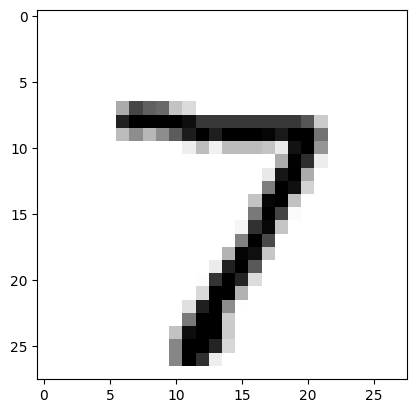

In [ ]:
plt.imshow(x_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [ ]:
ele = ["0","1","2","3","4","5","6","7","8","9"]

y_pred = model.predict(x_test)
x_test_ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test_[i], cmap='binary')
    pred_ele = ele[y_pred[i].argmax()]
    actual_ele = ele[y_test_one_hot[i].argmax()]
    ax.set(title = f"Real Element is {actual_ele}\nPredict Element is {pred_ele}");

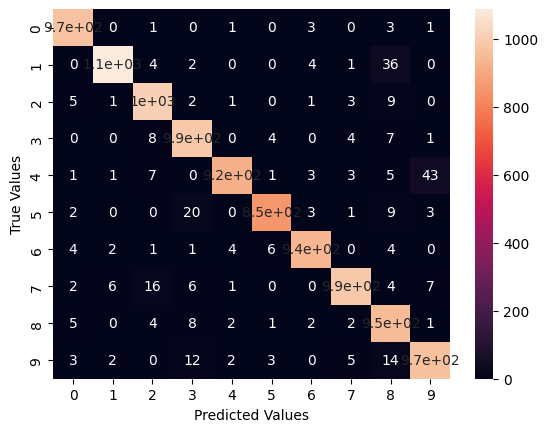

In [ ]:
print("Confusion Matrix: ")
y_pred = np.argmax(predictions, 1)
y_test = np.argmax(y_test_one_hot, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [ ]:
print("Classification Report: ")
classes = ['0','1','2','3','4','5','6','7','8','9']
y_pred = np.argmax(predictions, 1)
y_test = np.argmax(y_test_one_hot, 1)
print(classification_report(y_test, y_pred, target_names = classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.96      0.97      1135
           2       0.96      0.98      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.99      0.93      0.96       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.91      0.97      0.94       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy: 96.66%
